In [1]:
# 1.1.1 - Import Packages

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
# 1.1.2 - Load the Dataset

def load_data():
  X = np.load("/content/X.npy")
  y = np.load("/content/y.npy")
  X = X[0:1000]
  y = y[0:1000]
  return X, y

X, y = load_data()

In [7]:
# 1.1.3 - Inspect the Data

print('The first element of X is:', X[0, 0])
print('The first element of y is: ', y[0,0])
print('The last element of y is: ', y[-1,0])

The first element of X is: 0.0
The first element of y is:  0
The last element of y is:  1


In [8]:
# 1.1.4 - Dimensions of the Variables

print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


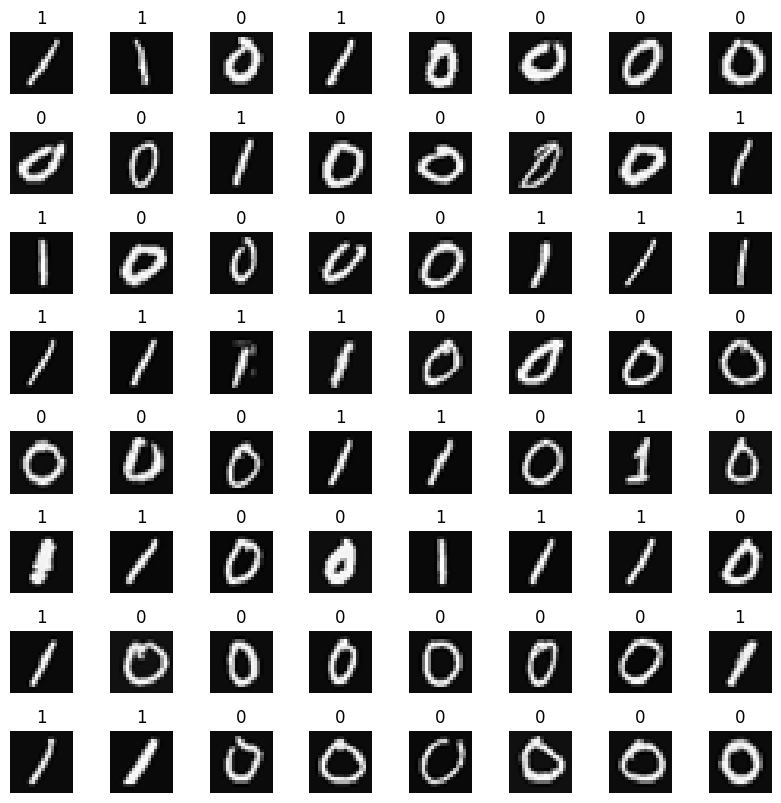

In [9]:
# 1.1.5 Visualize the Data

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = X[random_index].reshape((20,20)).T

  ax.imshow(X_random_reshaped, cmap='gray')

  ax.set_title(y[random_index,0])
  ax.set_axis_off()


In [10]:
# 1.1.8 - Exercise 1

from tensorflow.keras import backend as K
K.clear_session()

tf.get_logger().setLevel('ERROR')

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1, activation='sigmoid')
    ],
    name = "my_model"
)

model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 1.1.8 - Exercise 1

L1_num_params = 400 * 25 + 25
L2_num_params = 25 * 15 + 15
L3_num_params = 15 * 1 + 1
print("L1 params = " + str(L1_num_params), ", L2 params = " + str(L2_num_params), ", L3 params = " + str(L3_num_params))

L1 params = 10025 , L2 params = 390 , L3 params = 16


In [13]:
# 1.1.8 - Exercise 1

[layer1, layer2, layer3] = model.layers

W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [14]:
# 1.1.8 - Exercise 1

tf.get_logger().setLevel('ERROR')
print(model.layers[2].weights)

[<Variable path=my_model/dense_2/kernel, shape=(15, 1), dtype=float32, value=[[ 0.55815345]
 [ 0.3584261 ]
 [-0.36624604]
 [ 0.19126213]
 [-0.13944101]
 [-0.07950193]
 [ 0.3136466 ]
 [-0.13350534]
 [-0.3605364 ]
 [ 0.00886285]
 [ 0.38090122]
 [ 0.6065752 ]
 [-0.09649366]
 [ 0.04268587]
 [-0.35547483]]>, <Variable path=my_model/dense_2/bias, shape=(1,), dtype=float32, value=[0.]>]


In [15]:
# 1.1.8 - Exercise 1

tf.get_logger().setLevel('ERROR')
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6744
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5354
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3850
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2643
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1852
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1362
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1050
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0885
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0725
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0656
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0527
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0448
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0308
Epoch 16/20
32/32 ━

In [17]:
# 1.1.8 - Exercise 1

prediction = model.predict(X[0].reshape(1,400))
print(f'predicting a zero: {prediction}')
prediction = model.predict(X[500].reshape(1,400))
print(f'predicting a one: {prediction}')


if prediction >= 0.5:
  yhat = 1
else:
  yhat = 0
print(f'prediction after threshold: {yhat}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predicting a zero: [[0.01768823]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicting a one: [[0.983973]]
prediction after threshold: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

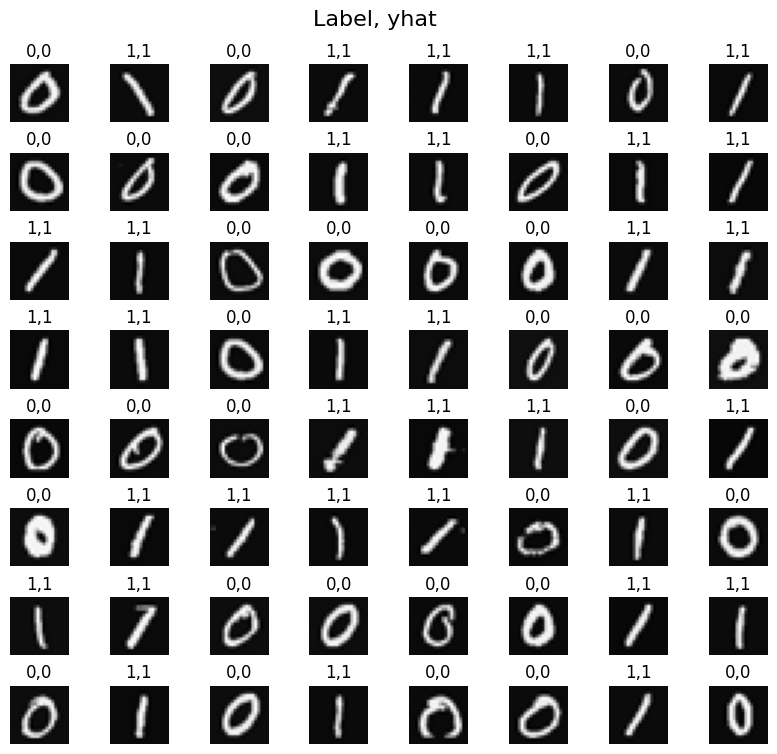

In [18]:
# 1.1.8 - Exercise 1

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1,rect=[0,0.03,1,0.92])

for i,ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = X[random_index].reshape((20,20)).T

  ax.imshow(X_random_reshaped, cmap='gray')

  prediction = model.predict(X[random_index].reshape(1,400))
  if prediction >= 0.5:
    yhat = 1
  else:
    yhat = 0

  ax.set_title(f'{y[random_index,0]},{yhat}')
  ax.set_axis_off()

fig.suptitle('Label, yhat', fontsize=16)
plt.show()

In [32]:
# 1.2.1 - Exercise 2

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=500, n_features=3, n_informative=2, n_redundant=1, n_classes=2, weights=[0.3,0.7], random_state=42)

In [33]:
# 1.2.1 - Exercise 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data_train = pd.DataFrame(X_train, columns=['Feature1', 'Feature2', 'Feature3'])
data_train['Target'] = y_train

data_test = pd.DataFrame(X_test, columns=['Feature1', 'Feature2', 'Feature3'])
data_test['Target'] = y_test

print("Training Data:")
print(data_train.head())

print("\nTest Data:")
print(data_test.head())


Training Data:
   Feature1  Feature2  Feature3  Target
0  1.224229  1.928054  0.007296       1
1 -0.865100 -1.192318 -1.139477       0
2  0.211251  0.192706  0.934610       1
3 -1.401276 -1.932030 -1.840829       0
4 -0.198932 -0.508017  1.296981       0

Test Data:
   Feature1  Feature2  Feature3  Target
0  0.911178  1.465512 -0.197822       1
1 -1.015027 -1.697924  0.656278       0
2  0.882972  1.286069  0.702192       1
3 -0.417356 -0.567793 -0.599233       0
4 -1.431794 -1.999805 -1.709582       0


In [34]:
# 1.2.1 - Exercise 2

model = Sequential([
    Dense(10, activation='relu', input_shape=(3,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


import tensorflow as tf
tf.get_logger().setLevel('ERROR')

history = model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7202 - loss: 0.4822   
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6880 - loss: 0.4791 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7278 - loss: 0.4438 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - loss: 0.4443 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7311 - loss: 0.4151 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7312 - loss: 0.3887 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7292 - loss: 0.4031 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 0.4005 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8217 - loss: 0.3827 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8325 - loss: 0.3784 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8273 - loss: 0.3692 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

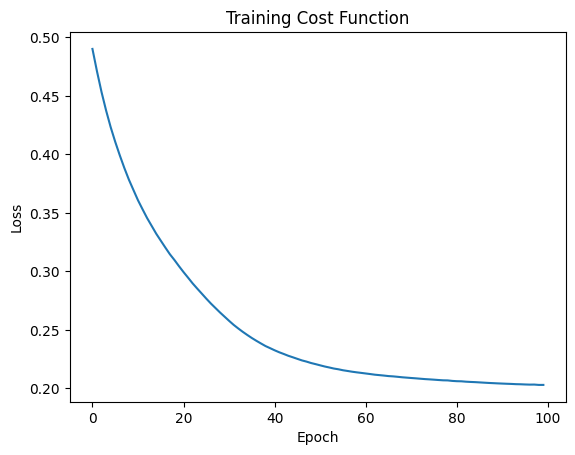

In [36]:
# 1.2.1 - Exercise 2

plt.plot(history.history['loss'])
plt.title('Training Cost Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [37]:
# 1.2.1 - Exercise 2

train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9183 - loss: 0.1889  
Training Accuracy: 0.9175
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9048 - loss: 0.1870
Test Accuracy: 0.9000


In [40]:
# 1.2.2 - Exercise 2 (Setup)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
import pandas as pd

def build_and_train_model(hidden_layers, neurons, activation='relu',
                          regularizer=None, reg_strength=0.0,
                          epochs=100, batch_size=32):

    model = Sequential()
    model.add(Dense(neurons[0], activation=activation, input_shape=(3,),
                    kernel_regularizer=regularizer(reg_strength) if regularizer else None))

    for i in range(1, hidden_layers):
        model.add(Dense(neurons[i], activation=activation,
                        kernel_regularizer=regularizer(reg_strength) if regularizer else None))

    model.add(Dense(1, activation='sigmoid'))  # output layer

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'config': {
            'layers': hidden_layers,
            'neurons': neurons,
            'activation': activation,
            'regularizer': regularizer.__name__ if regularizer else None,
            'reg_strength': reg_strength,
            'epochs': epochs,
            'batch_size': batch_size
        }
    }


In [41]:
# 1.2.2 - Exercise 2 (Run Experiments)

experiments = []

# 1-layer, relu, no regularization
experiments.append(build_and_train_model(
    hidden_layers=1, neurons=[10], activation='relu', epochs=100, batch_size=32
))

# 2-layers, tanh, L2 regularization
experiments.append(build_and_train_model(
    hidden_layers=2, neurons=[20, 10], activation='tanh',
    regularizer=l2, reg_strength=0.01, epochs=100, batch_size=32
))

# 3-layers, sigmoid, L1 regularization
experiments.append(build_and_train_model(
    hidden_layers=3, neurons=[50, 30, 10], activation='sigmoid',
    regularizer=l1, reg_strength=0.1, epochs=100, batch_size=32
))

# 1-layer, relu, large batch size
experiments.append(build_and_train_model(
    hidden_layers=1, neurons=[20], activation='relu', epochs=100, batch_size=64
))

# 2-layers, relu, small batch size and more epochs
experiments.append(build_and_train_model(
    hidden_layers=2, neurons=[15, 10], activation='relu', epochs=200, batch_size=16
))


In [42]:
# 1.2.2 - Exercise 2 (Results)

results_df = pd.DataFrame([{
    'Layers': exp['config']['layers'],
    'Neurons': exp['config']['neurons'],
    'Activation': exp['config']['activation'],
    'Reg': exp['config']['regularizer'],
    'Reg Strength': exp['config']['reg_strength'],
    'Epochs': exp['config']['epochs'],
    'Batch Size': exp['config']['batch_size'],
    'Train Acc': round(exp['train_acc'], 4),
    'Test Acc': round(exp['test_acc'], 4)
} for exp in experiments])

display(results_df)


,Layers,Neurons,Activation,Reg,Reg Strength,Epochs,Batch Size,Train Acc,Test Acc
0,1,[10],relu,None,0.00,100,32,0.9100,0.89
1,2,"[20, 10]",tanh,L2,0.01,100,32,0.9175,0.89
2,3,"[50, 30, 10]",sigmoid,L1,0.10,100,32,0.7075,0.67
3,1,[20],relu,None,0.00,100,64,0.9150,0.89
4,2,"[15, 10]",relu,None,0.00,200,16,0.9150,0.91


After experimenting with various neural network configurations, the best-performing model was a two-layer network with 15 and 10 neurons, ReLU activations, no regularization, trained over 200 epochs with a small batch size of 16. This configuration achieved the highest test accuracy of 91%, suggesting that deeper training with more frequent updates can lead to better generalization. Interestingly, models with regularization (L1 and L2) did not improve test performance and in some cases, like the 3-layer sigmoid model with L1, significantly underperformed, indicating possible underfitting or poor convergence. ReLU consistently yielded strong results, while sigmoid showed poorer training and test accuracy. Overall, the experiment highlights that a balanced architecture with moderate depth and ReLU activation, combined with increased epochs and smaller batch size, offers the most reliable performance on this dataset.

